In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('amazon_sales_data 2025.csv')
data.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [15]:
data.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


<I><b>By looking at the statistical metrics , we can conclude that the minimum order value is 15$ , the average order value is 343$ and the maximum order value is 1200$.<b></I>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [5]:
data.columns

Index(['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method',
       'Status'],
      dtype='object')

In [7]:
data.drop(['Order ID','Date'],axis=1,inplace=True)

In [8]:
data.columns

Index(['Product', 'Category', 'Price', 'Quantity', 'Total Sales',
       'Customer Name', 'Customer Location', 'Payment Method', 'Status'],
      dtype='object')

<I><b>Total number of items per category</b></I>

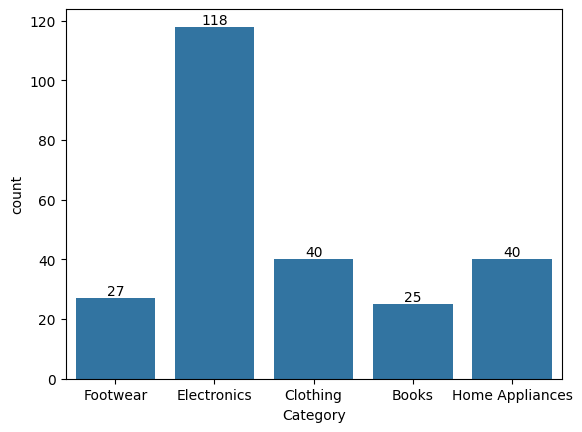

In [19]:
status = sns.countplot(x = 'Category', data = data)

for bars in status.containers:
    status.bar_label(bars)

<Axes: xlabel='Category', ylabel='Total Sales'>

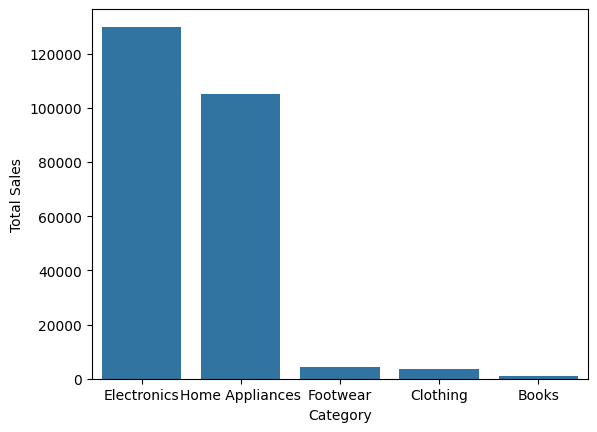

In [ ]:
sales_per_category = data.groupby(['Category'],as_index=False)['Total Sales'].sum().sort_values(by='Total Sales', ascending=False)
sns.barplot(x='Category', y ='Total Sales',data=sales_per_category)


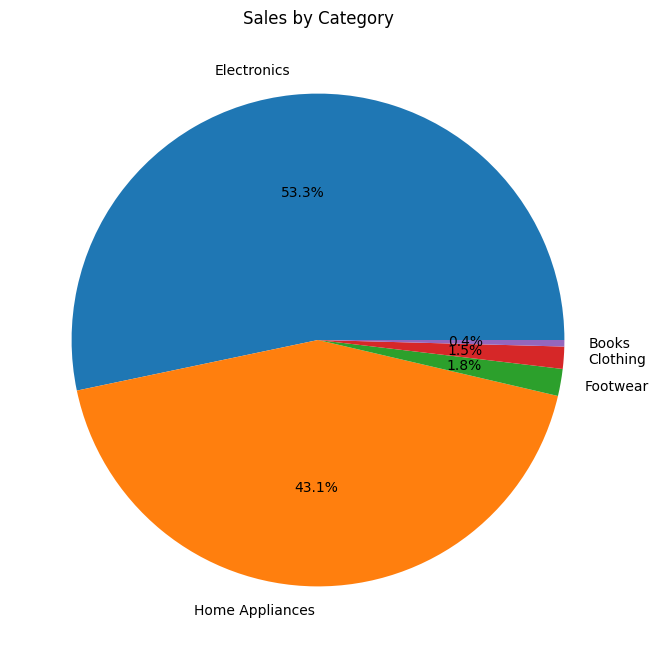

In [36]:
plt.figure(figsize=(8, 8))
plt.pie(
    sales_per_category['Total Sales'], 
    labels=sales_per_category['Category'], 
    autopct='%1.1f%%'
)
plt.title('Sales by Category')
plt.show()



<i><b>By analyzing the sales per category , we can conclude that 53% of the Sales comes from Electronics Category, 43% of the total sales comes from Home appliances category ,1.8% of the sales comes from Footwear category , 1.5% of the sales comes from Clothing category and 0.4% of the sales comes from books category</b></i>

<i><b>Location Wise total Sales</b></i>

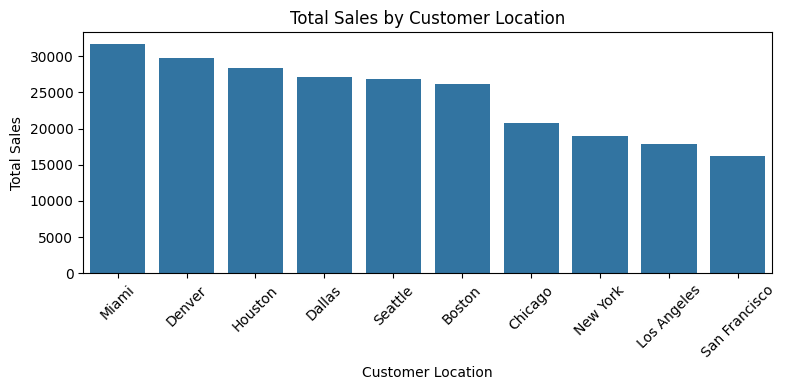

In [45]:
location_wise_Sales = data.groupby('Customer Location', as_index=False)['Total Sales'].sum().sort_values(by='Total Sales', ascending=False)

plt.figure(figsize=(8, 4))

sns.barplot(x='Customer Location', y='Total Sales', data=location_wise_Sales)

plt.xticks(rotation=45)
plt.title('Total Sales by Customer Location')
plt.tight_layout()  
plt.show()


In [48]:
location_wise_Sales

,Customer Location,Total Sales
6,Miami,31700
3,Denver,29785
4,Houston,28390
2,Dallas,27145
9,Seattle,26890
0,Boston,26170
1,Chicago,20810
7,New York,18940
5,Los Angeles,17820
8,San Francisco,16195


<i><b>Payment Status through different payment methods</b></i>

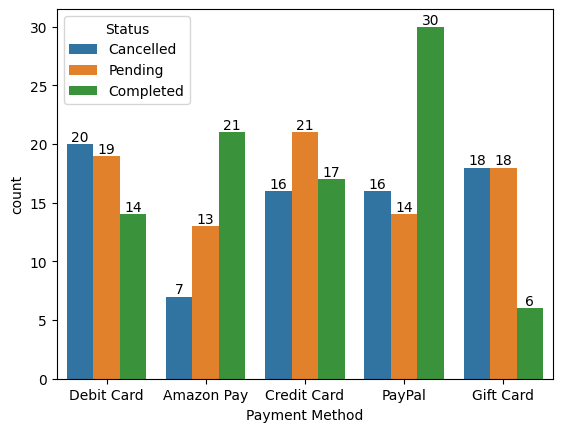

In [58]:
mot = data.groupby(['Payment Method'],as_index=False)['Status'].value_counts()
sop = sns.countplot(x = 'Payment Method', hue='Status',data=data)
for bars in sop.containers:
    sop.bar_label(bars)

In [70]:
Completed_transactions = data
for i in range(len(Completed_transactions)):
    if Completed_transactions['Status'][i] in ['Cancelled','Pending']:
        Completed_transactions = Completed_transactions.drop(i,axis=0)

<i><b>Quantity Sold per category</b></i>

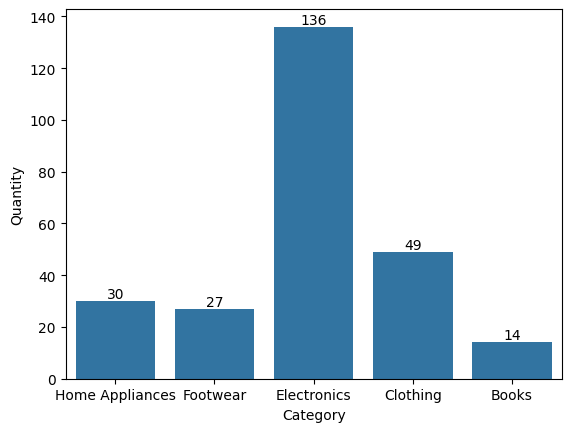

In [76]:
quantity_sold_perCategory = Completed_transactions.groupby(['Category'],as_index=False)['Quantity'].sum().sort_values(by='Category',ascending=False)
qos = sns.barplot(x='Category',y='Quantity',data=quantity_sold_perCategory)

for bars in qos.containers:
    qos.bar_label(bars)

<h2>By observing the statistical analysis of Amazon Sales Data , we can draw the following conclusions :</h2>
<ul>
    <li>We can conclude that the minimum order value is 15$ , the average order value is 343$ and the maximum order value is 1200$.</li><br>
    <li>We can conclude that 53% of the Sales comes from Electronics Category, 43% of the total sales comes from Home appliances category ,1.8% of the sales comes from Footwear category , 1.5% of the sales comes from Clothing category and 0.4% of the sales comes from books category.</li><br>
    <li>Majority of the Sales comes from miami city , where as only a small portion of sales comes from san francisco.</li><br>
    <li>Maximum quantity of products are sold from Electronics Category whereas least quantity of products are sold from books category.</li><br>
</ul>